<a href="https://colab.research.google.com/github/abdurahuman6669-ops/DSA/blob/main/case_study_abdu_rahuman_a_oct_9_thu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import k_means
from scipy.stats.mstats import winsorize

In [32]:
adult = pd.read_csv('/content/adult_dataset.csv')
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [3]:
adult.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [4]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [6]:
# removing ? and replacing it with nan
adult = adult.replace('?', np.nan)

In [7]:
num_adults = adult.select_dtypes(include=['float64', 'int64'])
num_adults

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

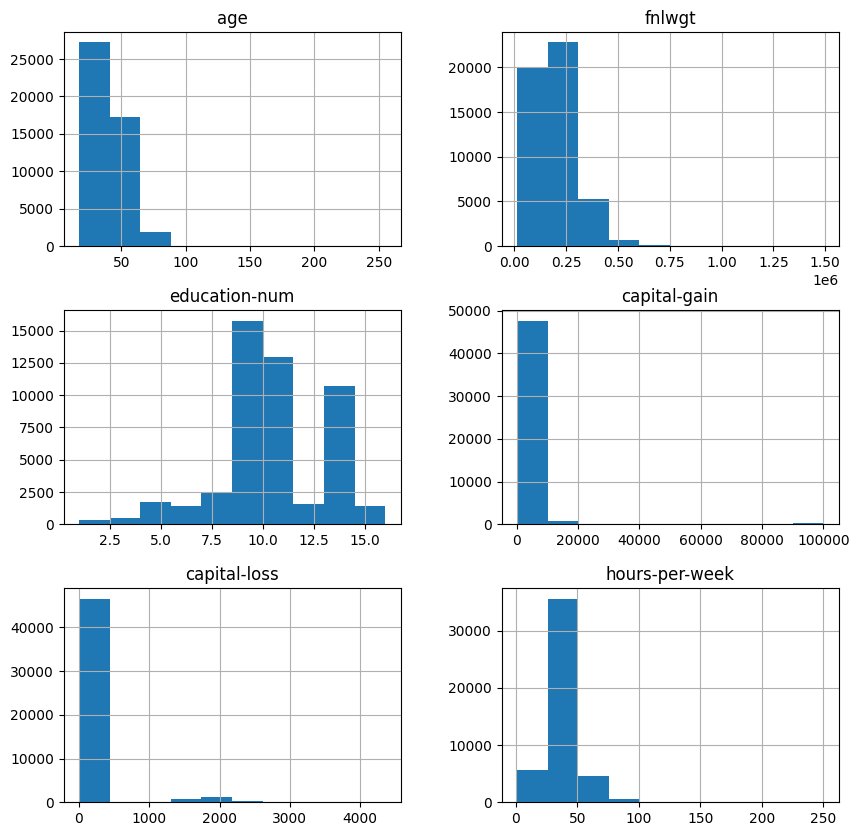

In [8]:
num_adults.hist(figsize=(10,10))

In [9]:
adult.fillna({'age': adult['age'].mean()}, inplace=True)

In [10]:
adult.fillna({'hours-per-week': adult['hours-per-week'].median()}, inplace=True)

In [11]:
adult.fillna({'hours-per-week': adult['hours-per-week'].mode()}, inplace=True)

In [12]:
adult.isna().sum()

,0
age,0
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


In [13]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.426170
std,13.599664,1.056040e+05,2.570973,7452.019058,403.004552,12.327157
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [14]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       43717 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      43727 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  48842 non-null  float64
 13  native-country  45582 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [15]:
# removing ? and replacing it with nan
adult = adult.replace('?', np.nan)

In [16]:
num_adults = adult.select_dtypes(include=['float64', 'int64'])
num_adults

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

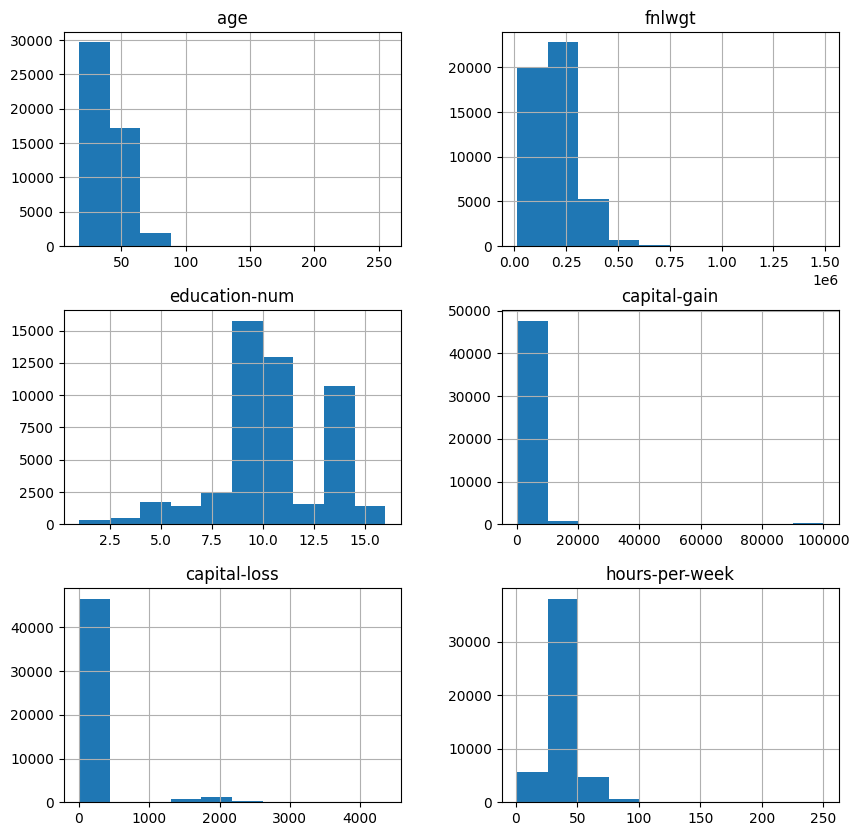

In [17]:
num_adults.hist(figsize=(10,10))

In [18]:
adult.fillna({'age': adult['age'].mean()}, inplace=True)

In [20]:
adult.fillna({'hours-per-week': adult['hours-per-week'].median()}, inplace=True)

In [21]:
adult['occupation']=adult['occupation'].fillna(adult['occupation'].mode()[0])

In [22]:
adult['workclass']=adult['workclass'].fillna(adult['workclass'].mode()[0])

In [23]:
adult['native-country']=adult['native-country'].fillna(adult['native-country'].mode()[0])

In [24]:
adult.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [25]:
adult.duplicated().sum()

np.int64(21)

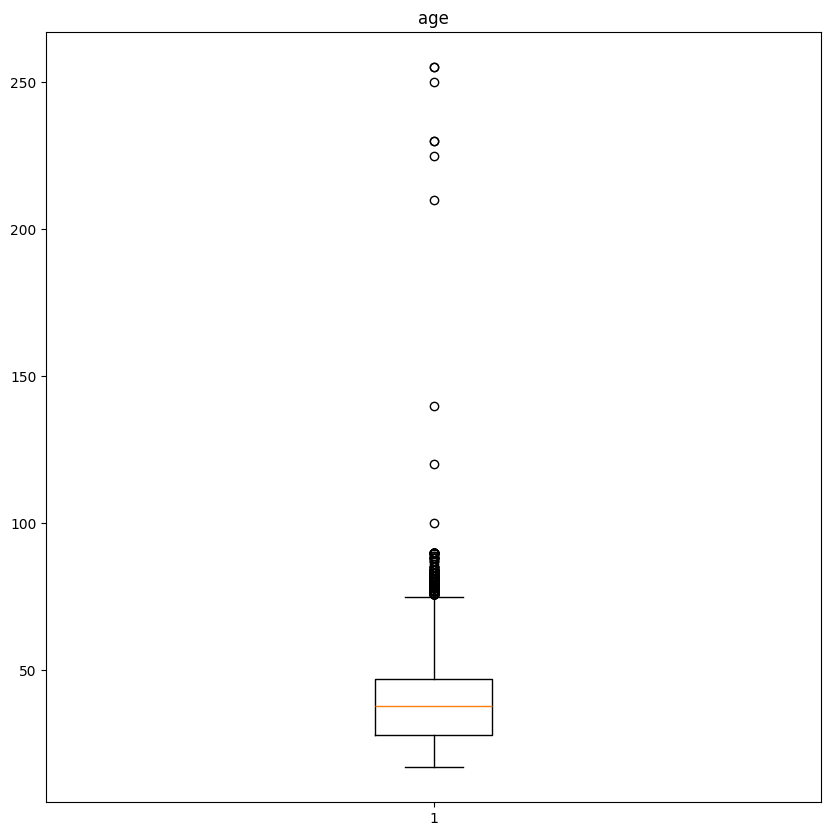

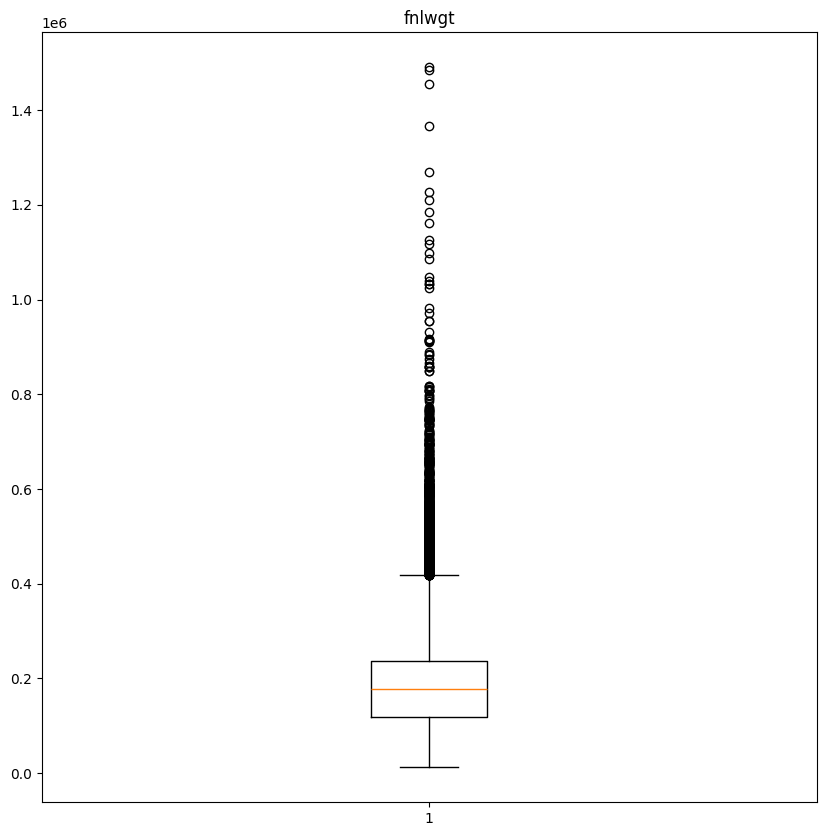

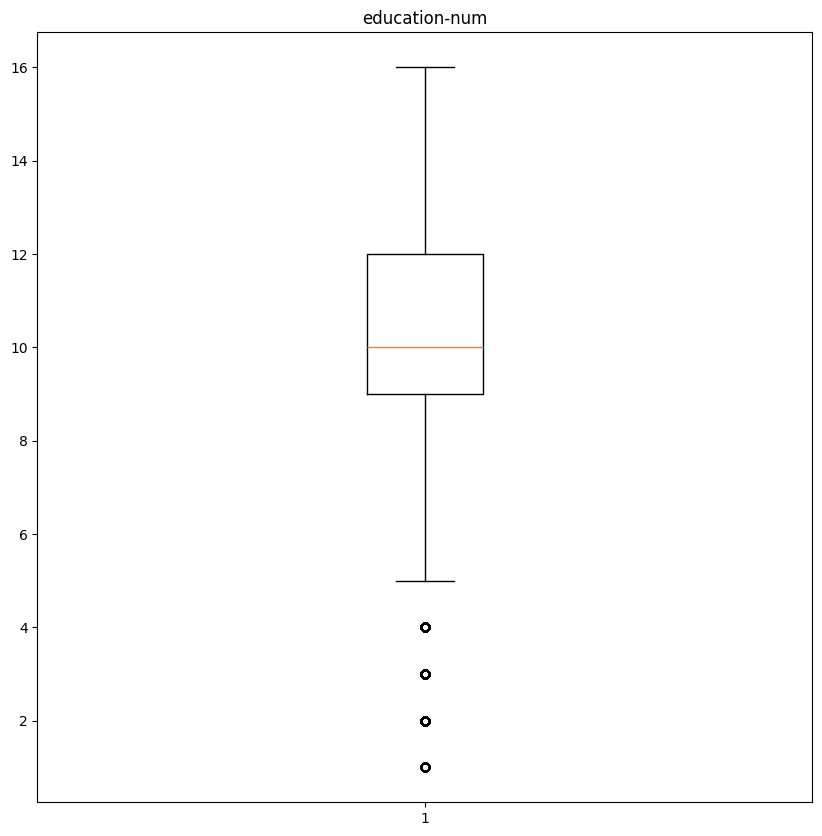

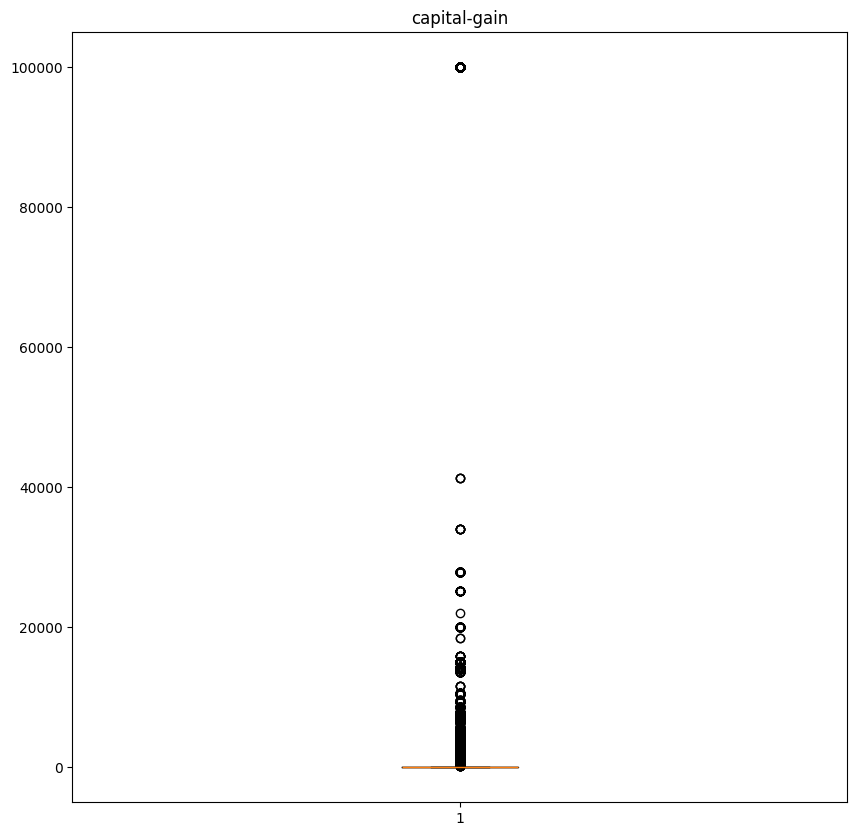

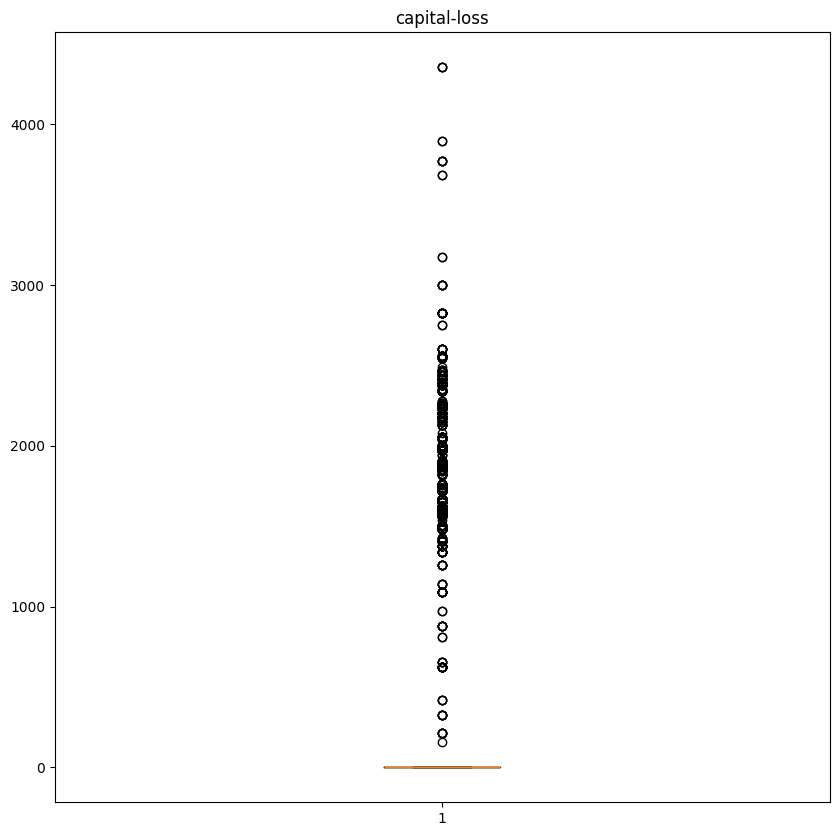

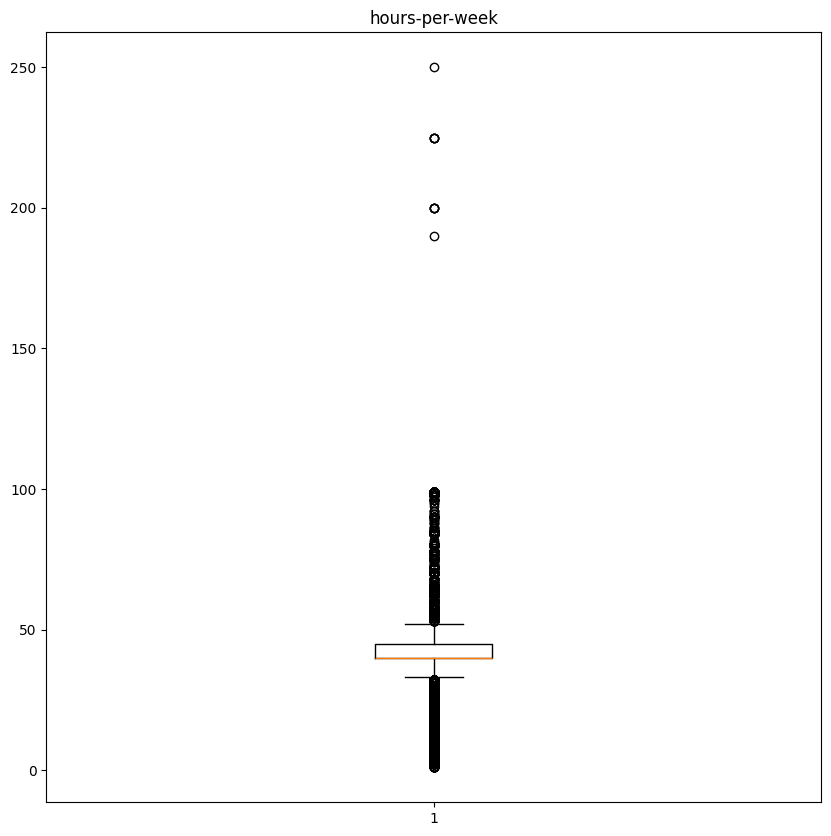

In [27]:
for i in num_adults :
  plt.figure(figsize=(10,10))
  plt.boxplot(adult[i])
  plt.title(i)
  plt.show()

In [33]:
adult['age'] = winsorize(adult['age'],limits=(.05,.0))

In [34]:
adult['hours-per-week'] = winsorize(adult['hours-per-week'],limits=(.05,.0))

In [35]:
adult['fnlwgt'] = winsorize(adult['fnlwgt'],limits=(.05,.0))

In [36]:
adult['education-num'] = winsorize(adult['education-num'],limits=(.05,.0))

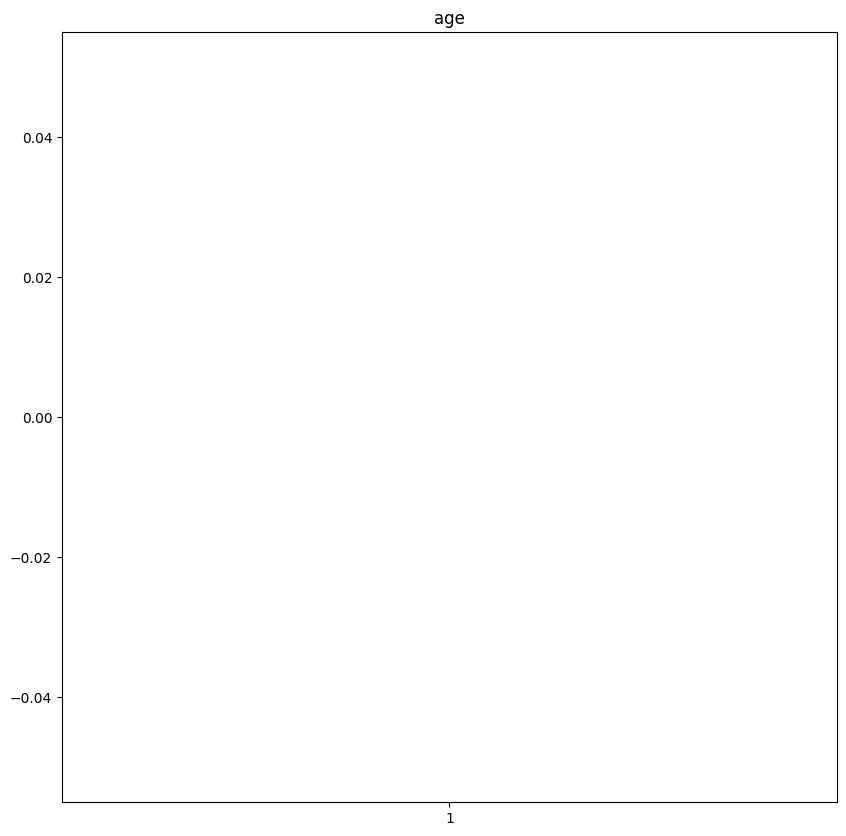

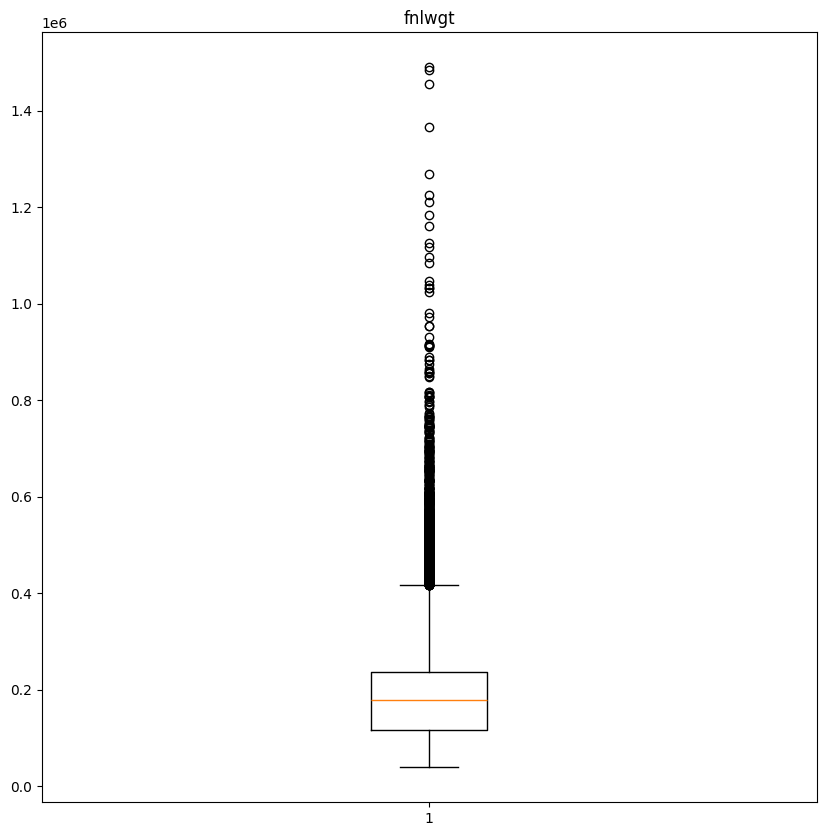

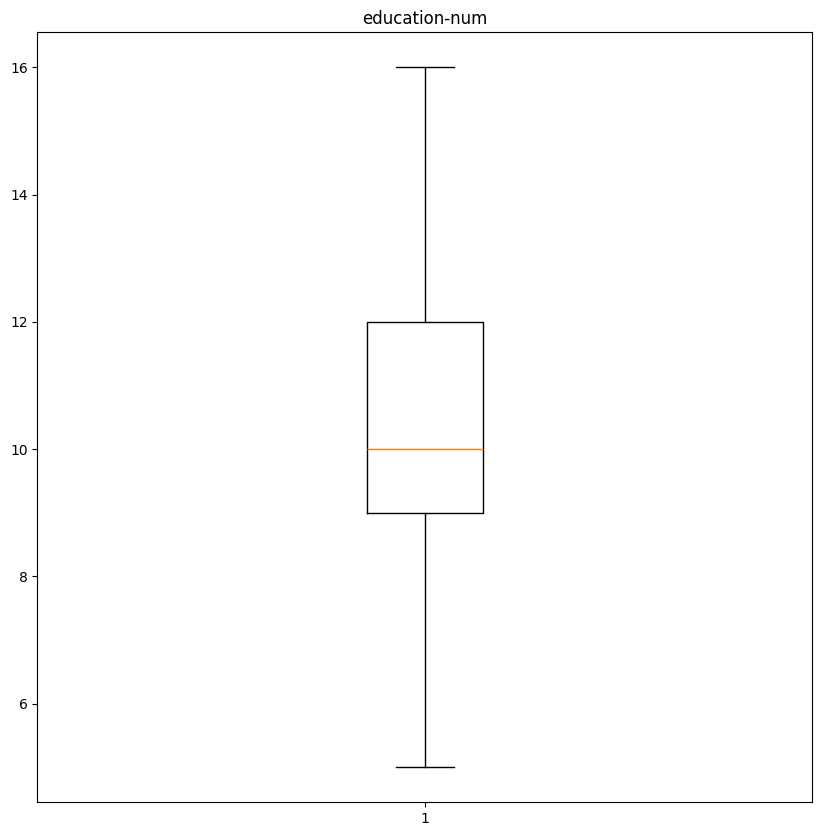

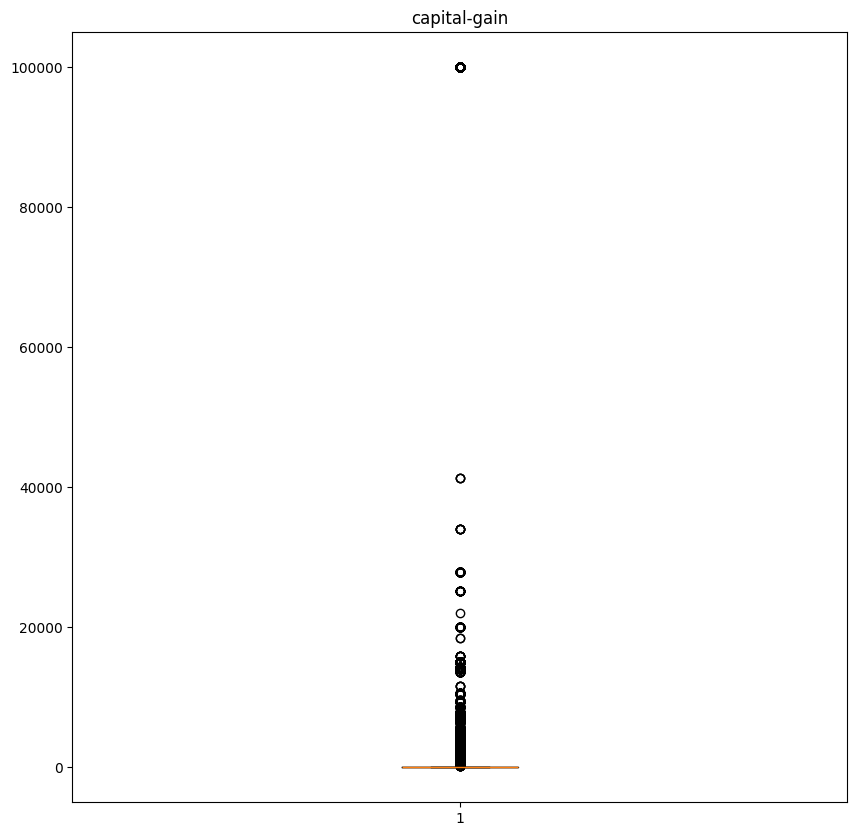

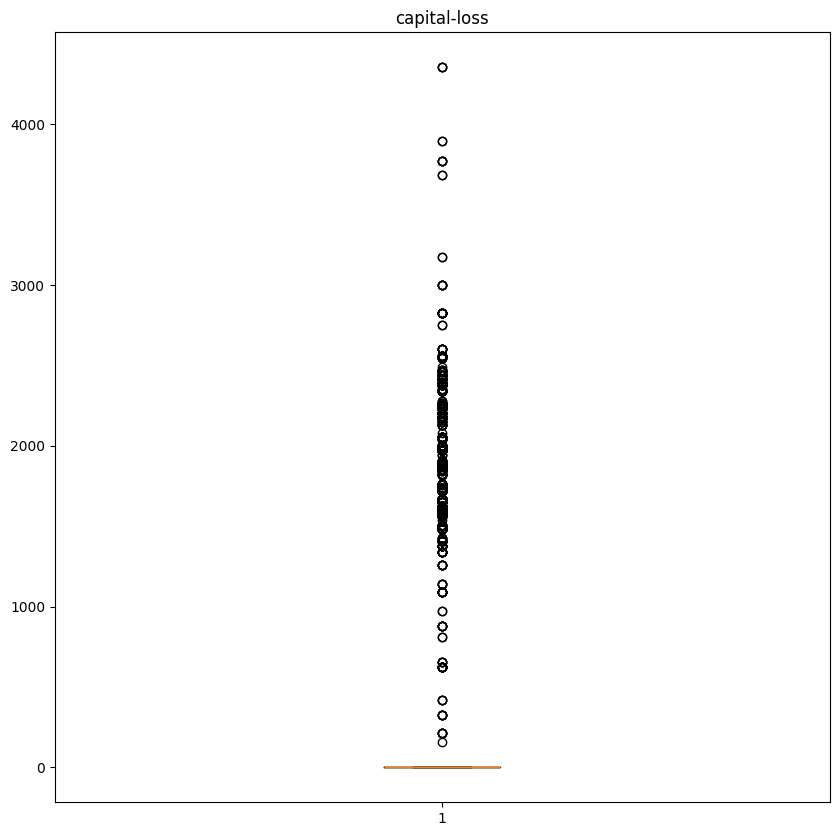

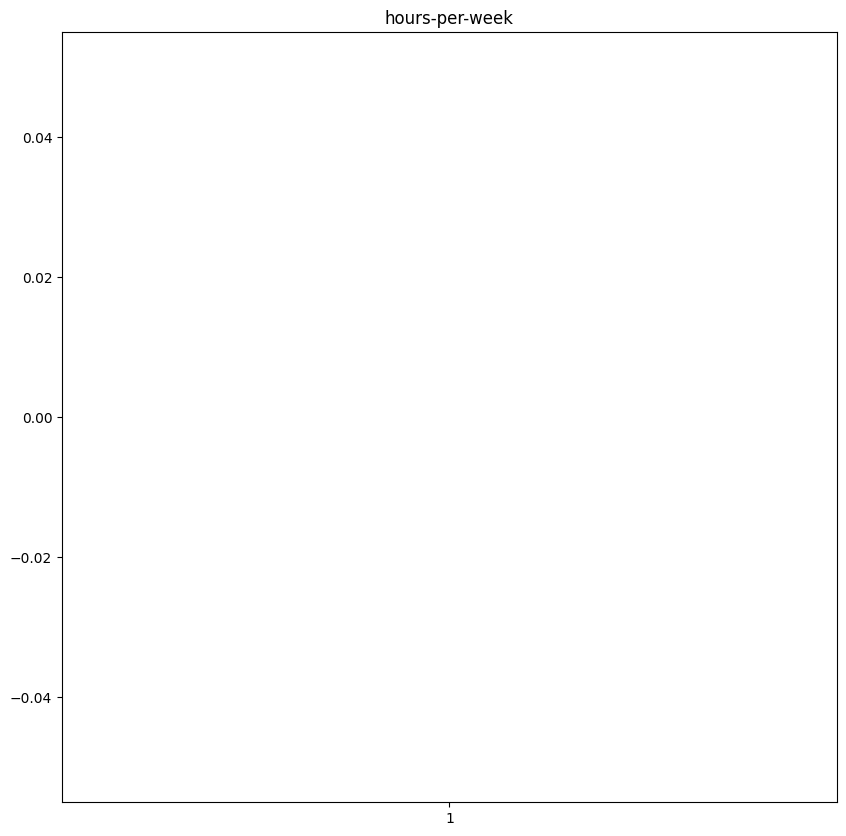

In [37]:
for i in num_adults :
  plt.figure(figsize=(10,10))
  plt.boxplot(adult[i])
  plt.title(i)
  plt.show()